In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [3]:
random_state = 123

In [4]:
jiaolv_idx = 7 
jiaolv_classes = ["无（轻度）","一般（存疑）","重度（很明显）"]

In [7]:
types = ["房树人", "树", "雨中人"]
type_idx = 2
dfs = [pd.read_excel(io=f"./绘画分类数据集/{t}.xlsx",sheet_name="Sheet1", header=None, usecols=[0,type_idx,jiaolv_idx]).dropna() for t in types]

In [8]:
total = sum([len(df) for df in dfs])

In [9]:
train_rate = 0.7
val_rate = 0.1
test_rate = 0.2
print("total: ", total)
train_nums, val_nums = int(total*train_rate), int(total*val_rate)
test_nums = total - train_nums - val_nums
print("train/val/test: ", train_nums, val_nums, test_nums)

total:  1855
train/val/test:  1298 185 372


In [10]:
train_ = []
val_ = []
test_ = []
for df in dfs:
    X = df.values
    ttt = np.unique(X[:, 1])
    print("在",ttt,"中划分")
    assert len(ttt) == 1, "类别不正确" 
    y = X[:, 2]

    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_rate, random_state=random_state, shuffle=True, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_rate/(train_rate+val_rate), random_state=random_state, shuffle=True, stratify=y_train_val)

    train_.append(X_train)
    val_.append(X_val)
    test_.append(X_test)
    
print("合并")
train_xl = np.concatenate(train_)
val_xl = np.concatenate(val_)
test_xl = np.concatenate(test_)

在 ['房树人'] 中划分
在 ['树'] 中划分
在 ['雨中人'] 中划分
合并


In [11]:
np.random.seed(random_state)
s_train_xl = np.random.permutation(train_xl)
s_val_xl = np.random.permutation(val_xl)
s_test_xl = np.random.permutation(test_xl)

In [12]:
print(s_train_xl.shape, s_val_xl.shape, s_test_xl.shape)

(1295, 3) (188, 3) (372, 3)


In [13]:
np.unique(s_test_xl[:,2])

array(['一般（存疑）', '无（轻度）', '重度（很明显）'], dtype=object)

In [14]:
def array_to_dict(array):
    headers = ["filepath", "type", "label"]
    df_dict = {}
    for i, h in enumerate(headers):
        df_dict[h] = array[:, i]
    return df_dict

In [15]:
def save_xslx(dir:str, filename:str, results:dict, sheet_name="Sheet1"):
    result_filename = f"{dir}/{filename}.xlsx"
    exists = os.path.exists(result_filename)
    mode = "a" if exists else "w"
    kwargs={
      "mode":mode,
      "if_sheet_exists":"replace"
    }if exists else {
      "mode":mode
    }
    sheet = pd.DataFrame(results)
    with pd.ExcelWriter(result_filename, **kwargs) as xlsx:
        # print(f"save sheet_name")
        sheet.to_excel(xlsx, index=False, sheet_name=sheet_name)

In [16]:
save_dir = "./dataset"
os.makedirs(save_dir, exist_ok=True)
save_xslx(save_dir, "train", array_to_dict(s_train_xl))
save_xslx(save_dir, "val", array_to_dict(s_val_xl))
save_xslx(save_dir, "test", array_to_dict(s_test_xl))

In [17]:
for n in ["train", "val", "test"]:
    df = pd.read_excel(io=f"{save_dir}/{n}.xlsx",sheet_name="Sheet1")
    print(df)

                                         filepath type    label
0           绘画资料（E）/湖南湘西土家苗族   黄爱君（15）/img036.jpg  雨中人    无（轻度）
1      绘画资料（E）/编号    张晓彤   树木画  厨师（16）/img167.jpg    树   一般（存疑）
2                  绘画资料（E）/编号  栾起业（13）/img917.jpg    树  重度（很明显）
3                  2024研招心理测试-pdf扫描件/035孟德健_3.jpg  房树人   一般（存疑）
4           绘画资料（E）/湖南湘西土家苗族   黄爱君（15）/img032.jpg  房树人   一般（存疑）
...                                           ...  ...      ...
1290  绘画资料（E）/四川成都  刘洋  树木画+雨中+房树人（11）/img663.jpg  雨中人   一般（存疑）
1291           绘画资料（E）/吉林长春  黄蕾   （20）/img580.jpg  雨中人   一般（存疑）
1292           绘画资料（E）/吉林长春  黄蕾   （20）/img569.jpg  房树人    无（轻度）
1293            科普周样本/20230927091352086_0012.tiff  雨中人    无（轻度）
1294               2024研招心理测试-pdf扫描件/063许鲲鹏_2.jpg  雨中人    无（轻度）

[1295 rows x 3 columns]
                                 filepath type    label
0          绘画资料（E）/北京市  晋军营（8）/img307.jpg  雨中人   一般（存疑）
1          2024研招心理测试-pdf扫描件/058李祝伟_3.jpg  房树人    无（轻度）
2      绘画资料（E）/安徽省合肥市   李琳玲（5）/img019.j

## 筛查错误

In [20]:
idxs = [i for i, s in enumerate(s_train_xl[:, 0]) if len(s.split("."))!=2]
s_train_xl[idxs]

array([], shape=(0, 3), dtype=object)

In [19]:
s_train_xl[idxs[0], 0] = "绘画资料（E）/吉林长春  黄蕾   （20）/img630.jpg"

In [23]:
idxs = [i for i, s in enumerate(s_train_xl[:, 0]) if not(s.endswith("jpg") or s.endswith("tiff"))]
s_train_xl[idxs]

array([], shape=(0, 3), dtype=object)

In [ ]:
s_train_xl[idxs[0], 0] = "2024研招心理测试-pdf扫描件/084李俊驰_3.jpg"

In [25]:
idxs = [i for i, s in enumerate(s_train_xl[:, 0]) if "绘画资料（E）/吉林长春 黄蕾（20）/img592.jpg" in s]
print(idxs)
s_train_xl[idxs]

[796]


array([['绘画资料（E）/吉林长春 黄蕾（20）/img592.jpg', '树', '一般（存疑）']], dtype=object)

In [26]:
s_train_xl[idxs[0], 0] = "绘画资料（E）/吉林长春  黄蕾   （20）/img592.jpg"

In [27]:
idxs = [i for i, s in enumerate(s_val_xl[:, 0]) if "2024研招心理测试-pdf扫描件/075刘基元" in s]
s_val_xl[idxs]

array([['2024研招心理测试-pdf扫描件/075刘基元_3.jpg', '雨中人', '重度（很明显）']], dtype=object)

In [28]:
idxs

[136]

In [29]:
s_val_xl[idxs[0], 0] = "2024研招心理测试-pdf扫描件/075刘基元_2.jpg"

In [30]:
idxs = [i for i, s in enumerate(s_test_xl[:, 0]) if "绘画资料（E）/吉林长春 黄蕾（20）/img628.jpg" in s]
print(idxs)
s_test_xl[idxs]

[85]


array([['绘画资料（E）/吉林长春 黄蕾（20）/img628.jpg', '树', '一般（存疑）']], dtype=object)

In [31]:
s_test_xl[idxs[0], 0] = "绘画资料（E）/吉林长春  黄蕾   （20）/img628.jpg"

In [32]:
idxs = [i for i, s in enumerate(s_test_xl[:, 0]) if "绘画资料（E）/吉林长春 黄蕾（20）/img621.jpg" in s]
print(idxs)
s_test_xl[idxs]

[290]


array([['绘画资料（E）/吉林长春 黄蕾（20）/img621.jpg', '树', '一般（存疑）']], dtype=object)

In [33]:
s_test_xl[idxs[0], 0] = "绘画资料（E）/吉林长春  黄蕾   （20）/img621.jpg"

## 重新保存

In [34]:
save_xslx(save_dir, "train", array_to_dict(s_train_xl))
save_xslx(save_dir, "val", array_to_dict(s_val_xl))
save_xslx(save_dir, "test", array_to_dict(s_test_xl))

## 分开保存

In [35]:
save_dir = "./dataset"
train_df = pd.read_excel(io=f"{save_dir}/train.xlsx",sheet_name="Sheet1").values
val_df = pd.read_excel(io=f"{save_dir}/val.xlsx",sheet_name="Sheet1").values
test_df = pd.read_excel(io=f"{save_dir}/test.xlsx",sheet_name="Sheet1").values

In [36]:
def save_t_by_alldf(df, t, name):
    df_ = df[np.where(df[:, 1]==t)[0],...]
    save_xslx(save_root, name, array_to_dict(df_))
    cls_nums = [len(np.where(df_[:, 2]==j)[0]) for j in jiaolv_classes]
    print(name, len(df_), cls_nums, [n/len(df_) for n in cls_nums])

for t in types:
    save_root = f"{save_dir}/{t}"
    os.makedirs(save_root, exist_ok=True)
    print(t)
    save_t_by_alldf(train_df, t, "train")
    save_t_by_alldf(val_df, t, "val")
    save_t_by_alldf(test_df, t, "test")

房树人
train 244 [146, 78, 20] [0.5983606557377049, 0.319672131147541, 0.08196721311475409]
val 36 [21, 12, 3] [0.5833333333333334, 0.3333333333333333, 0.08333333333333333]
test 70 [42, 22, 6] [0.6, 0.3142857142857143, 0.08571428571428572]
树
train 770 [362, 259, 149] [0.4701298701298701, 0.33636363636363636, 0.19350649350649352]
val 111 [52, 38, 21] [0.46846846846846846, 0.34234234234234234, 0.1891891891891892]
test 221 [104, 75, 42] [0.47058823529411764, 0.3393665158371041, 0.19004524886877827]
雨中人
train 281 [148, 102, 31] [0.5266903914590747, 0.36298932384341637, 0.1103202846975089]
val 41 [22, 15, 4] [0.5365853658536586, 0.36585365853658536, 0.0975609756097561]
test 81 [43, 29, 9] [0.5308641975308642, 0.35802469135802467, 0.1111111111111111]


## 统计均值和方差

In [37]:
train_df = pd.read_excel(io=f"{save_dir}/train.xlsx",sheet_name="Sheet1").values
val_df = pd.read_excel(io=f"{save_dir}/val.xlsx",sheet_name="Sheet1").values

In [ ]:
from tqdm import tqdm
rgb_means = []
rgb_stds = []
targets = [train_df, val_df]
for t_xl in targets:
    for s_idx in tqdm(range(t_xl.shape[0])):
        filename = t_xl[s_idx,0].replace("/", "_")
        # print(s_idx, t_xl[s_idx, 1], t_xl[s_idx, 2], filename)
        image = cv2.cvtColor(cv2.imread(f"./绘画分类数据集/{t_xl[s_idx, 1]}/焦虑/{t_xl[s_idx, 2]}/{filename}", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB).astype(np.float32).reshape((-1, 3))
        image /= 255.
        rgb_means.append(image.mean(axis=0))
        rgb_stds.append(image.std(axis=0))

  1%|          | 16/1295 [00:24<31:35,  1.48s/it]

In [198]:
mean = np.vstack(rgb_means).mean(axis=0)
std = np.vstack(rgb_stds).mean(axis=0)
np.savetxt(f"{save_dir}/mean.txt", mean)
np.savetxt(f"{save_dir}/std.txt", std)

In [199]:
print("Mean: ", mean)
print("Std:", std)

Mean:  [0.9069681  0.90663886 0.90883267]
Std: [0.16861193 0.16850951 0.1685644 ]


In [40]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2

s_idx = 0
filename = s_train_xl[s_idx,0].replace("/", "_")
image = Image.open(f"./绘画分类数据集/{s_train_xl[s_idx, 1]}/焦虑/{s_train_xl[s_idx, 2]}/{filename}").convert('RGB')
# image = cv2.cvtColor(cv2.imread(f"./绘画分类数据集/{s_train_xl[s_idx, 1]}/焦虑/{s_train_xl[s_idx, 2]}/{filename}", cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

In [215]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize([256]),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

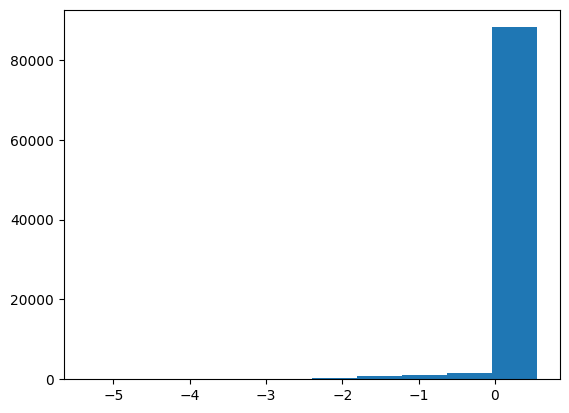

In [216]:
plt.hist(transform(image)[0,...].reshape((-1,)))
plt.show()

In [217]:
u = np.unique(train_df[:, 2])

In [218]:
train_l = [len(np.where(train_df[:, 2]==t)[0])/train_df.shape[0] for t in u]
val_l = [len(np.where(val_df[:, 2]==t)[0])/val_df.shape[0] for t in u]
test_l = [len(np.where(test_df[:, 2]==t)[0])/test_df.shape[0] for t in u]

In [219]:
print(train_l)
print(val_l)
print(test_l)

[0.338996138996139, 0.5065637065637065, 0.15444015444015444]
[0.34574468085106386, 0.5053191489361702, 0.14893617021276595]
[0.3387096774193548, 0.5080645161290323, 0.1532258064516129]
